# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Units
temp_units = "imperial"

# URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [22]:
# Create lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start counter 
record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through city list 
for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        # Increase counter by one 
        record = record + 1
        time.sleep(1)
        
    # Skip if no record is found
    except:
        print("City not found. Skipping...")
    continue

print(f"-------------------------------")
print(f"Data Retrieval Complete!")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Ambanja
Processing Record 2 | Brae
Processing Record 3 | Iqaluit
Processing Record 4 | Morant Bay
Processing Record 5 | Logrono
Processing Record 6 | Tuatapere
Processing Record 7 | Rikitea
Processing Record 8 | Thompson
Processing Record 9 | Tuktoyaktuk
Processing Record 10 | Ushuaia
Processing Record 11 | Bathsheba
Processing Record 12 | Cognac
Processing Record 13 | Hilo
Processing Record 14 | Hobart
Processing Record 15 | Monroe
Processing Record 16 | Upata
Processing Record 17 | Butaritari
Processing Record 18 | Camabatela
Processing Record 19 | Prince Rupert
Processing Record 20 | Sorong
Processing Record 21 | Atuona
Processing Record 22 | Busselton
Processing Record 23 | Saint-Philippe
Processing Record 24 | Hobyo
Processing Record 25 | Alihe
Processing Record 26 | Ojinaga
Processing Record 27 | Mount Gambier
Processing Record 28 | Lock Haven
City not found. Skipping...
Processing Record 29 | Kapaa
Ci

Processing Record 231 | Tevriz
Processing Record 232 | Mangaratiba
Processing Record 233 | Kamina
Processing Record 234 | Nisia Floresta
Processing Record 235 | Raudeberg
Processing Record 236 | Katsuura
City not found. Skipping...
Processing Record 237 | Dudinka
Processing Record 238 | Okha
Processing Record 239 | Davila
Processing Record 240 | Luderitz
Processing Record 241 | Padang
City not found. Skipping...
Processing Record 242 | Normandin
Processing Record 243 | Freetown
Processing Record 244 | Belaya Gora
Processing Record 245 | Saskylakh
Processing Record 246 | Barreirinha
Processing Record 247 | Egvekinot
Processing Record 248 | Les Cayes
Processing Record 249 | Norman Wells
Processing Record 250 | Yurimaguas
Processing Record 251 | Ekhabi
Processing Record 252 | Kavaratti
Processing Record 253 | Babynino
Processing Record 254 | Bredasdorp
Processing Record 255 | Bilibino
City not found. Skipping...
Processing Record 256 | Batagay-Alyta
Processing Record 257 | Mahebourg
City 

Processing Record 449 | Cidreira
City not found. Skipping...
Processing Record 450 | Benjamin Constant
Processing Record 451 | Vieux Fort
Processing Record 452 | Matamoros
Processing Record 453 | Kindersley
Processing Record 454 | Bud
Processing Record 455 | Puri
Processing Record 456 | Zlitan
Processing Record 457 | Muli
Processing Record 458 | Tivaouane
Processing Record 459 | Beringovskiy
Processing Record 460 | Yining
Processing Record 461 | Yorosso
Processing Record 462 | Dunedin
Processing Record 463 | Sinnar
Processing Record 464 | Ust-Omchug
Processing Record 465 | Ampere
Processing Record 466 | Saurimo
Processing Record 467 | Fukuma
Processing Record 468 | Grand Gaube
Processing Record 469 | Stonewall
Processing Record 470 | Bonavista
Processing Record 471 | Svetlogorsk
Processing Record 472 | North Bend
Processing Record 473 | Havre-Saint-Pierre
Processing Record 474 | Chara
Processing Record 475 | Letnyaya Stavka
Processing Record 476 | Vega de Alatorre
Processing Record 477

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
# Create a dictonary
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a dataframe
weather_data = pd.DataFrame(weather_dict)
 
weather_data.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [24]:
# Save dataframe to CSV
weather_data.to_csv('weather_data.csv')
 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ambanja,54,MG,1567108209,73,-13.68,48.45,77.53,5.41
1,Brae,100,GB,1567108210,87,60.40,-1.35,57.20,21.92
2,Iqaluit,90,CA,1567108211,93,63.75,-68.52,39.20,21.92
3,Morant Bay,40,JM,1567108212,62,17.88,-76.41,87.80,11.41
4,Logrono,0,ES,1567108213,69,42.47,-2.45,77.00,1.12


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

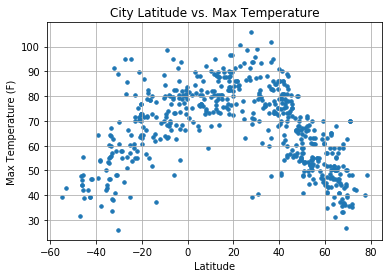

In [25]:
# Build scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=12)

# Graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save plot
plt.savefig('max_temp_vs_lat.png')

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

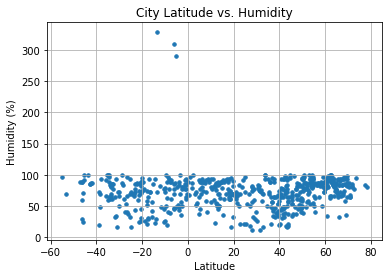

In [26]:
# Build scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=12)

# Graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save plot
plt.savefig('humidity_vs_lat.png')

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

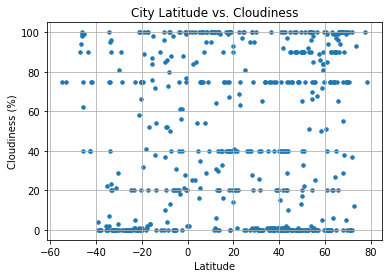

In [27]:
# Build scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=12)

# Graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save plot
plt.savefig('cloudiness_vs_lat.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

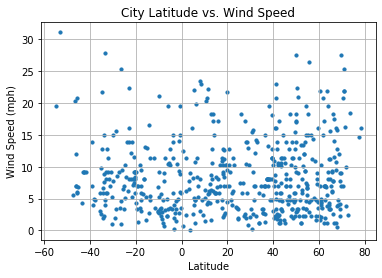

In [28]:
# Build scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save plot
plt.savefig('wind_speed_vs_lat.png')

# Show plot
plt.show()